In [272]:
# Dependencies
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [273]:
# Read CSV
csv_path1 = os.path.join('HW','ride_data.csv')
csv_path2 = os.path.join('HW','city_data.csv')


ride_data = pd.read_csv(csv_path1)
city_data = pd.read_csv(csv_path2)
ride_data.head()


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [274]:
city_df = pd.DataFrame(city_data)
city_df['type'].value_counts()

Urban       66
Suburban    42
Rural       18
Name: type, dtype: int64

In [275]:
test = ride_data.groupby(['city'])
test2 = test.agg({'fare': 'mean', 'ride_id':'count'})
sum_df = pd.DataFrame(test2).reset_index()
sum_df.head()

,city,fare,ride_id
0,Alvarezhaven,23.928710,31
1,Alyssaberg,20.609615,26
2,Anitamouth,37.315556,9
3,Antoniomouth,23.625000,22
4,Aprilchester,21.981579,19


In [276]:
# Merge two dataframes using an outer join - 123 & 654
merge_table = pd.merge(sum_df, city_df, on="city", how="outer")
type_count = []
for row in merge_table['type']:
 
    if row == 'Urban':
 
        type_count.append('b')

    elif row == 'Suburban':

        type_count.append('r')

    else:
  
        type_count.append('y')
merge_table['type_count'] = type_count

merge_table.head()


,city,fare,ride_id,driver_count,type,type_count
0,Alvarezhaven,23.928710,31,21,Urban,b
1,Alyssaberg,20.609615,26,67,Urban,b
2,Anitamouth,37.315556,9,16,Suburban,r
3,Antoniomouth,23.625000,22,21,Urban,b
4,Aprilchester,21.981579,19,49,Urban,b


In [277]:
x = merge_table['ride_id']
y = merge_table['fare']
z = merge_table['driver_count']



In [278]:
testtable = merge_table['type'] == 'Urban'
urban_df = merge_table[testtable]
testtable2 = merge_table['type'] == 'Suburban'
suburban_df = merge_table[testtable2]
testtable3 = merge_table['type'] == 'Rural'
Rural_df = merge_table[testtable3]
Rural_df.head()

,city,fare,ride_id,driver_count,type,type_count
17,East Leslie,33.660909,11,9,Rural,y
18,East Stephen,39.053000,10,6,Rural,y
19,East Troybury,33.244286,7,3,Rural,y
21,Erikport,30.043750,8,3,Rural,y
25,Hernandezshire,32.002222,9,10,Rural,y


/Users/solomonmiller/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


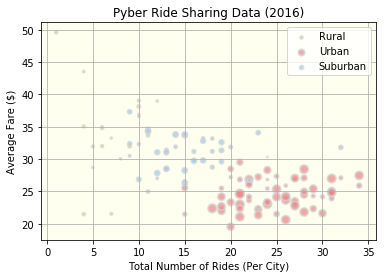

In [279]:
fig, ax = plt.subplots()
plt.scatter(Rural_df['ride_id'], Rural_df['fare'], s=Rural_df['driver_count'], c='Gold', alpha=0.7, edgecolor = 'lightgrey', linewidth=2)
plt.scatter(urban_df['ride_id'], urban_df['fare'], s=urban_df['driver_count'], c='LightCoral', alpha=0.7, edgecolor = 'lightgrey', linewidth=2)
plt.scatter(suburban_df['ride_id'], suburban_df['fare'], s=suburban_df['driver_count'], c='LightSkyBlue', edgecolor = 'lightgrey', alpha=0.7, linewidth=2)
plt.legend()

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
#plt.legend((Rural_df['type'],urban_df['type'],suburban_df['type'])
plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('Rural')
L.get_texts()[1].set_text('Urban')
L.get_texts()[2].set_text('Suburban')
ax.set_axis_bgcolor("ivory")
ax.set_clip_on(False)
plt.savefig('Bubble_chart.png')
plt.show()

In [280]:
test = ride_data.groupby(['city'])
test2 = test.agg({'fare': 'sum', 'ride_id':'count'})
sum_df = pd.DataFrame(test2).reset_index()
merge_table = pd.merge(sum_df, city_df, on="city", how="outer")
citytp = merge_table.groupby(['type'])
group = citytp.agg({'fare': 'sum', 'ride_id':'count','driver_count':'sum'})
citytype_df = pd.DataFrame(group).reset_index()
citytype_df

,type,fare,ride_id,driver_count
0,Rural,4255.09,18,104
1,Suburban,20335.69,42,638
2,Urban,40078.34,66,2607


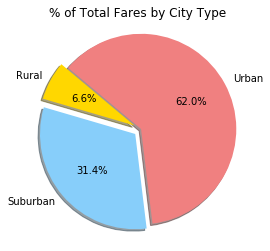

In [283]:
labels = citytype_df['type']
sizes = citytype_df['fare']
colors = ['gold','lightskyblue','lightcoral']
explode = (0.08,0.08,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("image")
plt.title("% of Total Fares by City Type")
plt.savefig('Pie_chart1.png')
plt.show()

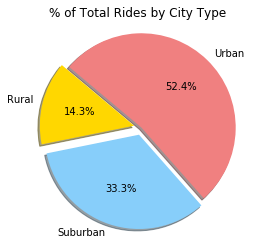

In [281]:
labels = citytype_df['type']
sizes = citytype_df['ride_id']
colors = ['gold','lightskyblue','lightcoral']
explode = (0.08,0.08,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("image")
plt.title("% of Total Rides by City Type")
plt.savefig('Pie_chart2.png')
plt.show()

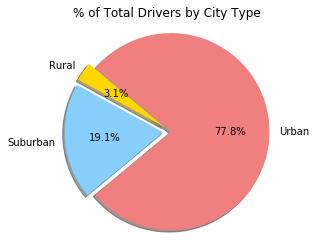

In [282]:
labels = citytype_df['type']
sizes = citytype_df['driver_count']
colors = ['gold','lightskyblue','lightcoral']
explode = (0.08,0.08,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("image")
plt.title("% of Total Drivers by City Type")
plt.savefig('Pie_chart3.png')
plt.show()